In [141]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import json
from shapely.geometry import Polygon, LinearRing, shape
from shapely.ops import cascaded_union
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [32]:
IntZoneShp = gpd.read_file("SG_IntermediateZoneBdry_2011/SG_IntermediateZone_Bdry_2011.shp")\
            .drop(['ResPop2011', "HHCnt2011", "StdAreaHa", "StdAreaKm2", \
                   "Shape_Leng", "Shape_Area", "TotPop2011", "Name"], axis = 1)

In [27]:
SevenDayTrends = pd.read_csv('7daytrends/trend_iz_20210201.csv')\
                        .drop(["CAName", "IntZoneName", "Positive7DayQF",\
                               "CrudeRate7DayPositiveQF", "CA"], axis = 1)\
                        .rename({"CrudeRate7DayPositive":"Crude7DayPos"}, axis = 1)

print(SevenDayTrends)

SevenDayTrends = SevenDayTrends.sort_values(by=['IntZone', "Date"])\
                .reset_index().drop(["index"], axis = 1)

            Date    IntZone  Positive7Day  Population Crude7DayPos
0       20200305  S02001370           NaN        3797          NaN
1       20200305  S02001371           NaN        5703          NaN
2       20200305  S02001372           NaN        2596          NaN
3       20200305  S02001373           NaN        5576          NaN
4       20200305  S02001374           NaN        2222          NaN
...          ...        ...           ...         ...          ...
363536  20210129  S02002510           4.0        5705     50 to 99
363537  20210129  S02002511           7.0        4504   100 to 199
363538  20210129  S02002512           5.0        5556     50 to 99
363539  20210129  S02002513           3.0        3883     50 to 99
363540  20210129  S02002514           NaN        2952          NaN

[363541 rows x 5 columns]


In [33]:
SevenDayShape = IntZoneShp.merge(SevenDayTrends, left_on='InterZone', right_on='IntZone')

In [8]:
allDateWithShp = IntZoneShp.merge(allDateData, left_on='InterZone', right_on='IntZone')

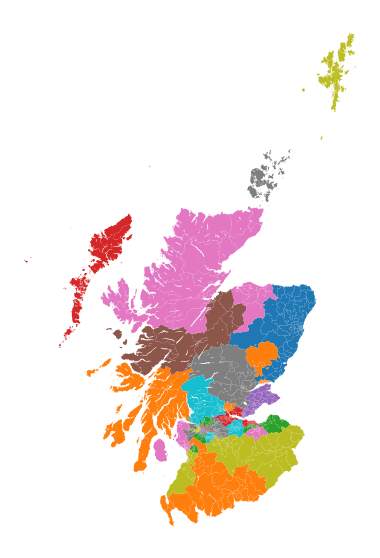

In [162]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1 = IntZoneShp.plot(column = "InterZone", ax = ax1)
ax1.set_axis_off()
plt.show()
fig.savefig("IntZones.png", dpi=300)

In [166]:
Date1 = 20210101
Date2 = 20210128

SelCol = "Positive7Day"
print(list(SevenDayShape.columns))
rmCols = []
for item in list(SevenDayShape.columns):
    if item not in [SelCol, "geometry", "InterZone"]:
        rmCols.append(item)
print(rmCols)
    
if SelCol not in SevenDayShape.columns:
    print("Error. Select a column in the database.")

toPlot1 = SevenDayShape[SevenDayShape.Date == Date1].drop(rmCols, axis = 1).reset_index()
toPlot2 = SevenDayShape[SevenDayShape.Date == Date2].drop(rmCols, axis = 1).reset_index()

diffDf = toPlot1.merge(toPlot2, left_on='InterZone', right_on='InterZone')\
            .drop(["InterZone", "index_x", "geometry_x", "index_y"], axis = 1)
diffDf = diffDf.rename({"geometry_y":"geometry"},axis =1)
diffDf = diffDf.rename({SelCol+"_y":"y"},axis =1)
diffDf = diffDf.rename({SelCol+"_x":"x"},axis =1)
columns_titles = ["geometry","x"]
diffDf = diffDf.reindex(columns=columns_titles)

diff = toPlot1[SelCol] - toPlot2[SelCol]
#diff = diff.fillna(0)

toPlot1["D"] = diff
print(toPlot1)

['InterZone', 'geometry', 'Date', 'IntZone', 'Positive7Day', 'Population', 'Crude7DayPos']
['Date', 'IntZone', 'Population', 'Crude7DayPos']
       index  InterZone                                           geometry  \
0        249  S02001236  POLYGON ((379360.200 804845.000, 379373.900 80...   
1        527  S02001237  POLYGON ((383981.182 806104.601, 383973.868 80...   
2        805  S02001238  POLYGON ((389550.557 803884.610, 389581.784 80...   
3       1083  S02001239  POLYGON ((392626.000 804064.000, 392632.000 80...   
4       1361  S02001240  POLYGON ((393251.008 805451.033, 393249.774 80...   
...      ...        ...                                                ...   
1274  362356  S02002510  POLYGON ((305570.800 679833.600, 305571.800 67...   
1275  362645  S02002511  POLYGON ((308614.000 674472.000, 308712.000 67...   
1276  362934  S02002512  POLYGON ((306156.144 674905.838, 306133.106 67...   
1277  363223  S02002513  POLYGON ((308686.000 672220.000, 308688.000 67...   
1

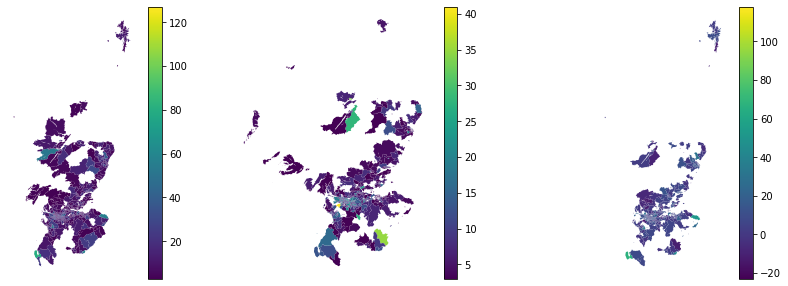

In [176]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax1 = toPlot1.plot(column = SelCol, ax = ax1, legend = True)
#ax1 = toPlot1.plot(column = "index", ax = ax1)
ax1.set_axis_off()

ax2 = fig.add_subplot(132)
ax2 = toPlot2.plot(column = SelCol, ax = ax2, legend=True)
ax2.set_axis_off()

ax3 = fig.add_subplot(133)
ax3 = toPlot1.plot(column = "D", ax = ax3, legend = True)
ax3.set_axis_off()

plt.show()

fig.savefig("Changes.png", dpi=300)